## DataFrame
- 2차원 배열 형식
- 표같은 스프레드시트 자료구조
- 여러개의 컬럼을 가지고 서로 다른 구조의 값이 담긴다.
- DataFrame은 다양한 방법으로 생성
    1. 리스트 값을 딕셔너리로 사용
    2. Numpy 배열 활용
    3. read_csv(), read_excel() 함수등을 이용

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [17]:
#1-1. 딕셔너리를 통한 DataFrame 생성

list_dic = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
            'year':[2000,2001,2002,2000,2001,2002],
            'pop':[1.5,1.7,3.6,2.4,2.9,3.2]
            }
    
liDf = DataFrame(list_dic)
liDf #DataFrame은 Series의 모임임

print(liDf.state)
print(liDf.year)
# print(liDf.pop) #pop은 내장함수임. 그래서 다 나옴
print(liDf['pop']) #대괄호 안에 싸주면 컬럼명으로 인식해서 나옴(**예약어를 변수로 썼을 때 활용)
print('*'*30)

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object
0    2000
1    2001
2    2002
3    2000
4    2001
5    2002
Name: year, dtype: int64
0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pop, dtype: float64
******************************


In [55]:
data1={'name':['아이린','슬기','웬디','조이','예리'],
      'address':['서울','대전','광주','대구','부산'],
      'age':[30,27,27,25,22]}
df1 = DataFrame(data1)
df1

,name,address,age
0,아이린,서울,30
1,슬기,대전,27
2,웬디,광주,27
3,조이,대구,25
4,예리,부산,22


In [78]:
np.random.seed(100)

In [79]:
#1-2 Numpy배열을 이용 :: 1)array() 2)random
#reshape안하면 Serise형태 반환함
df2 = DataFrame(np.random.randint(10,100,16).reshape(4,4),
               index=list('abcd')
               ,columns=list('abcd')) 
df2

#컬럼명 수정하기
df2.columns = ['one','two','three','four']
df2

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [31]:
#1-3 read_csv()사용
'''
csv : Comma Seperated Value
'''
df3 = pd.read_csv('../data/tips.csv') #data까지하고 /한담에 자동완성하면 파일 볼수있음
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


### DataFrame - 구조 확인
- index , values, columns, dtype

In [38]:
print(df3.index)
print(df3.values)
print(df3.columns) #컬럼에 대한 정보
print(df3['tip'].dtype)
print(df3.dtypes)
print('*'*30)
df3.info() #전체 정보

RangeIndex(start=0, stop=245, step=1)
[[16.99 1.01 'Female' ... 'Sun' 'Dinner' 2.0]
 [10.34 1.66 'Male' ... 'Sun' 'Dinner' 3.0]
 [21.01 3.5 'Male' ... 'Sun' 'Dinner' 3.0]
 ...
 [17.82 1.75 'Male' ... 'Sat' 'Dinner' 2.0]
 [18.78 3.0 'Female' ... 'Thur' 'Dinner' 2.0]
 [25.34 nan nan ... nan nan nan]]
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
float64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        

In [42]:
# 가장 많이 사용되는 조회 함수~
df3
df3.head(1)
df3.head()
df3.head(5)
df3.tail(2)
df3.tail()
df3.info()
df3.shape #몇행 몇열인지 튜플형태로 반환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


(245, 7)

### DataFrame - 컬럼명 변경 및 추가

In [56]:
# 1. 컬럼명 변경
'''
1) 컬럼명 전체 수정 columns
2) 컬럼명 부분 수정 rename
'''
df2.columns = ['A-class','B-class','C-class','D-class'] # 전체변경은 원본이 바뀜
df1.rename(columns={'address':'addr'},inplace=True) #원본이 바뀌지 않음. Overwirte 필요. #inplace=True 하면 원본 바뀜
df1

,name,addr,age
0,아이린,서울,30
1,슬기,대전,27
2,웬디,광주,27
3,조이,대구,25
4,예리,부산,22


In [58]:
#2 컬럼추가
df1
df1['phone']=np.nan #NaN은 np가 제공하는 데이터임
df1

,name,addr,age,phone
0,아이린,서울,30,NaN
1,슬기,대전,27,NaN
2,웬디,광주,27,NaN
3,조이,대구,25,NaN
4,예리,부산,22,NaN


### DataFrame - 조회하기 (인덱싱, 슬라이싱)

In [60]:
df2.columns = ['one','two','three','four']
df2

,one,two,three,four
a,93,63,88,10
d,23,67,86,13
c,80,13,94,89
d,20,97,70,13


In [69]:
df2[0:2] # 인덱스는 뒷부분이 포함되지 않는다.
df2['a':'c'] # 라벨로 적용할 땐 뒷부분 포함
df2['one':'three'] # 행에 'one','three'가 없음(이건 인덱스만 검색하는거)

,one,two,three,four


In [143]:
#컬럼명 조회
df2[['one','three']] #데이터 프레임의 형태이기 때문에 이렇게 사용하는 것

#two 컬럼에 해당하는 값 중에서 >45 추출
print(df2)
print(df2[df2['two']>45]) # 두번째 컬럼의 값만 추출되는 것이 아니라 해당 조건에 맞는 행이 모두 뜸 어떻게 필터링하는가?
# d = df2[df2.iloc[:,1:2]>45]
#d2 = d.dropna(axis=1,how'all')
#d2=filna(0)

df2[df2['two']>45].iloc[:,1:2]

   one  two  three  four
a   18   34     77    97
b   89   58     20    62
c   63   76     24    44
d   34   25     70    68
   one  two  three  four
b   89   58     20    62
c   63   76     24    44


,two
b,58
c,76


### loc iloc, at, iat

In [97]:
#loc iloc
print(df1.iloc[0:2,0:3])
print('*'*30)

print(df1.iloc[:2,:3])
print('*'*30)

print(df1.loc[:2,'name':'age'])
print('*'*30)

print(df1.iloc[0:2])
print('*'*30)
print(df1.loc[0:1]) # loc는 라벨로 인식하기 때문에 맨 끝값도 인식함

  name addr  age
0  아이린   서울   30
1   슬기   대전   27
******************************
  name addr  age
0  아이린   서울   30
1   슬기   대전   27
******************************
  name addr  age
0  아이린   서울   30
1   슬기   대전   27
2   웬디   광주   27
******************************
  name addr  age  phone
0  아이린   서울   30    NaN
1   슬기   대전   27    NaN
******************************
  name addr  age  phone
0  아이린   서울   30    NaN
1   슬기   대전   27    NaN


In [104]:
#at iat 스칼라값 추출
print(df1)
print(df1.iloc[1:3])
print(df1.iat[1,1]) #열의 번호로 사용 가능
print(df1.at[1,'addr']) #열의 이름으로 사용

  name addr  age  phone
0  아이린   서울   30    NaN
1   슬기   대전   27    NaN
2   웬디   광주   27    NaN
3   조이   대구   25    NaN
4   예리   부산   22    NaN
  name addr  age  phone
1   슬기   대전   27    NaN
2   웬디   광주   27    NaN
대전
대전


In [108]:
df1.iat[3,2]
df1.at[3,'age']= 26 # 즉시 반영

In [111]:
# loc를 통한 row추가

df1.loc[4] = np.NaN
df1

,name,addr,age,phone
0,아이린,서울,30.0,NaN
1,슬기,대전,27.0,NaN
2,웬디,광주,27.0,NaN
3,조이,대구,26.0,NaN
4,NaN,NaN,NaN,NaN


###  삭제하기
- drop()

In [113]:
df1.drop(4) # 원본데이터가 삭제되지 않기 때문에 inplace=True해줘야함 
            # axis가 기본적으로 0으로 맞추어져있음 열을 지우고 싶으면 이걸 1로 바꾸면 됨
df1.drop('phone',axis=1,inplace=True)
df1

,name,addr,age
0,아이린,서울,30.0
1,슬기,대전,27.0
2,웬디,광주,27.0
3,조이,대구,26.0
4,NaN,NaN,NaN


In [114]:
df1.drop(4, inplace=True)
df1

,name,addr,age
0,아이린,서울,30.0
1,슬기,대전,27.0
2,웬디,광주,27.0
3,조이,대구,26.0


### DataFrame - 정렬하기 

In [122]:
df2.sort_index(axis=1) #?의 단축키 shft+tab 행을 기준으로 함
df2.sort_values(by=['four']) #by = 어떤값을 기준으로? by무조건 알아야함, 꼭 하나만 들어가야 하는 건 아님

,one,two,three,four
c,63,76,24,44
b,89,58,20,62
d,34,25,70,68
a,18,34,77,97


### 실전데이터로 응용하기

In [144]:
df3.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [148]:
import matplotlib.pyplot as plt

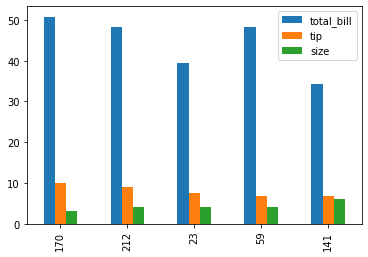

In [151]:
# 문제 1. tip의 비율로 sort(내림차순), 상위 5개만 출력

df3.sort_values(by='tip',ascending=False).head(5).plot(kind='bar') #numeric이 아닌경우에는 나타나지않음!!!!!!!!!!!!!!!
plt.show()

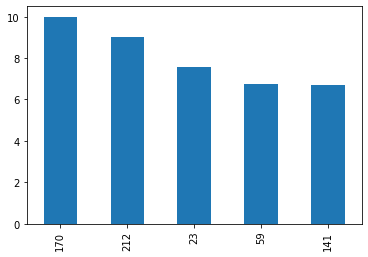

In [154]:
df3.sort_values(by=['tip'],ascending=False).head(5)['tip'].plot(kind='bar')
plt.show()

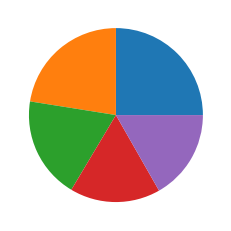

In [155]:
plt.pie(df3.sort_values(by=['tip'],ascending=False).head(5)['tip'])
plt.show()

In [156]:
# 문제2. day, tip별로 정렬, 각각 다르게 내림차순, 오름차순으로 다르게 정렬 마지막 데이터 7줄만 출력한다.
df3.sort_values(by=['day','tip'],ascending=[False,True]).tail(7)

,total_bill,tip,sex,smoker,day,time,size
94,22.75,3.25,Female,No,Fri,Dinner,2.0
221,13.42,3.48,Female,Yes,Fri,Lunch,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


### 알아두면 유용한 함수들

In [158]:
#1. unique() = sql distict
df3['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [162]:
#2. 각각의 컬럼들에 해당하는 값이 갯수
df3['day'].value_counts()
# df3['day'].count() 이건 해당 컬럼에 존재하는 모든 행의 개수

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [164]:
# 3. isin()
'''
unique() 함수를 이용해서 우선 어떤 요일이 있는지부터 확인
그 중에서 토,일이 있는 데이터만 검색
'''

df3[df3['day'].isin(['Thur','Fri'])]

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4.0
78,22.76,3.00,Male,No,Thur,Lunch,2.0
79,17.29,2.71,Male,No,Thur,Lunch,2.0
80,19.44,3.00,Male,Yes,Thur,Lunch,2.0
81,16.66,3.40,Male,No,Thur,Lunch,2.0
...,...,...,...,...,...,...,...
223,15.98,3.00,Female,No,Fri,Lunch,3.0
224,13.42,1.58,Male,Yes,Fri,Lunch,2.0
225,16.27,2.50,Female,Yes,Fri,Lunch,2.0
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0


In [168]:
#4. isNull() 누락데이터 확인하기 NaN()
df3.isnull().sum() # 열당 null 개수 확인
df3.isnull().sum(axis=1) # 행에 있는 null 개수 확인

0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    6
Length: 245, dtype: int64